### Import Library

In [1]:
import pandas as pd                               
import matplotlib.pyplot as plt                   
import seaborn as sns                             
from sklearn.cluster import DBSCAN                
import numpy as np                                
from sklearn.preprocessing import StandardScaler   
from sklearn.neighbors import NearestNeighbors 

### Prepare Data

In [2]:
test_features = pd.read_csv('test_features.csv')
test_labels = pd.read_csv('test_labels.csv')

test_features = test_features[['Age','Fare']]

test_features = pd.DataFrame(
    StandardScaler().fit_transform(test_features),
    columns=test_features.columns)

Survived_mapDict={
    1:'Survived',
    0:'Not Survived'
}

y=test_labels['Survived'].map(Survived_mapDict)

test_features.head(10)

,Age,Fare
0,-0.049184,-0.392468
1,0.050792,-0.513112
2,-0.794584,-0.578571
3,-1.870518,0.058863
4,-1.255699,-0.494257
5,-0.333470,1.224421
6,-0.049184,-0.583020
7,-1.101994,-0.322453
8,-1.101994,-0.583020
9,-0.871437,-0.111883


### Determine the parameter for DBSCAN

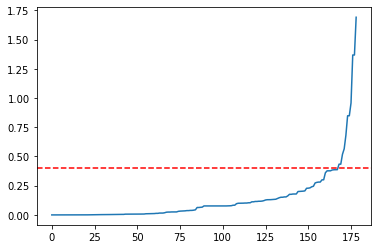

In [3]:
k = 7

# Fits a NearestNeighbors object to df
nn = NearestNeighbors(n_neighbors=k) \
    .fit(test_features)

# Finds the distance of k closest neighbors
dist, ind = nn.kneighbors(test_features)

# Sorts the distances
dist = np.sort(dist, axis=0)[:,1]

# Plots the distances
plt.plot(dist)

# Draws a horizontal line at the bend
plt.axhline(y=.4, color='red', ls='--')

### DBSCAN Clustering

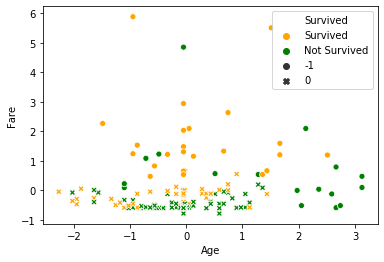

In [4]:
# Fits a DBSCAN object to df
db=DBSCAN(eps=0.4, min_samples=k) \
    .fit(test_features)

# Creates a scatter plot to visualize the clusters
sns.scatterplot(
    x='Age', 
    y='Fare',
    data=test_features, 
    hue=y,
    style=db.labels_,
    palette=['orange', 'green'])